In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage
from sklearn.manifold import TSNE

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


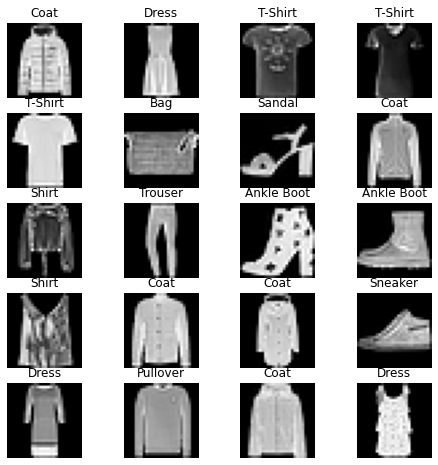

torch.Size([32, 784])
tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        ...,
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]])


100%|██████████| 1875/1875 [00:19<00:00, 95.12it/s]

====> Epoch: 1 Average loss: 24.8613



100%|██████████| 313/313 [00:02<00:00, 115.96it/s]

====> Val set loss (reconstruction error) : 9.3593



100%|██████████| 1875/1875 [00:19<00:00, 96.08it/s]

====> Epoch: 2 Average loss: 6.2133



100%|██████████| 313/313 [00:02<00:00, 110.70it/s]

====> Val set loss (reconstruction error) : 4.0361



100%|██████████| 1875/1875 [00:19<00:00, 95.42it/s]

====> Epoch: 3 Average loss: 3.0096



100%|██████████| 313/313 [00:02<00:00, 110.18it/s]

====> Val set loss (reconstruction error) : 2.2402



100%|██████████| 1875/1875 [00:19<00:00, 97.61it/s] 

====> Epoch: 4 Average loss: 1.8384



100%|██████████| 313/313 [00:02<00:00, 110.74it/s]

====> Val set loss (reconstruction error) : 1.5299



100%|██████████| 1875/1875 [00:19<00:00, 95.68it/s]

====> Epoch: 5 Average loss: 1.3583



100%|██████████| 313/313 [00:02<00:00, 116.09it/s]

====> Val set loss (reconstruction error) : 1.2167



100%|██████████| 1875/1875 [00:19<00:00, 97.29it/s] 

====> Epoch: 6 Average loss: 1.1532



100%|██████████| 313/313 [00:02<00:00, 113.88it/s]

====> Val set loss (reconstruction error) : 1.1013



100%|██████████| 1875/1875 [00:19<00:00, 98.13it/s]

====> Epoch: 7 Average loss: 1.0614



100%|██████████| 313/313 [00:02<00:00, 115.50it/s]

====> Val set loss (reconstruction error) : 1.0325



100%|██████████| 1875/1875 [00:19<00:00, 97.22it/s]

====> Epoch: 8 Average loss: 1.0193



100%|██████████| 313/313 [00:02<00:00, 113.22it/s]

====> Val set loss (reconstruction error) : 1.0106



100%|██████████| 1875/1875 [00:19<00:00, 97.38it/s] 

====> Epoch: 9 Average loss: 0.9985



100%|██████████| 313/313 [00:02<00:00, 116.55it/s]

====> Val set loss (reconstruction error) : 0.9939



100%|██████████| 1875/1875 [00:19<00:00, 96.53it/s] 

====> Epoch: 10 Average loss: 0.9877



100%|██████████| 313/313 [00:02<00:00, 111.45it/s]

====> Val set loss (reconstruction error) : 0.9957


In [ ]:



def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def scatter_plot(latent_representations, labels):
    '''
    the scatter plot for visualizing the latent representations with the ground truth class label
    ----------
    latent_presentations: (N, dimension_latent_representation)
    labels: (N, )  the labels of the ground truth classes
    '''
    # borrowed from https://gist.github.com/jakevdp/91077b0cae40f8f8244a

    # Note that if the dimension_latent_representation > 2 you need to apply TSNE transformation
    # to map the latent representations from higher dimensionality to 2D
    # You can use #from sklearn.manifold import TSNE#
    self.latent_representations = TSNE.fit_transform(self.latent_representations)
    def discrete_cmap(n, base_cmap=None):
        """Create an N-bin discrete colormap from the specified input map"""
        base = plt.cm.get_cmap(base_cmap)
        return base.from_list(base.name + str(n), base(np.linspace(0, 1, n)), n)

    plt.figure(figsize=(10, 10))
    plt.scatter(latent_representations[:, 0], latent_representations[:, 1], cmap=discrete_cmap(10, 'jet'), c=labels, edgecolors='black')
    plt.colorbar()
    plt.grid()
    plt.show()

def Plot_Kernel(_model):
    '''
    the plot for visualizing the learned weights of the autoencoder's encoder .
    ----------
    _model: Autoencoder
    '''
    Weights = _model.encoder.Encoder[0]
    Weights = Weights.weight.view(30,28,28)
    Weights = torch.Tensor.detach(Weights).numpy()
    print(Weights[0].shape)
    plt.imshow(Weights[5])

    # needs your implementation
    pass

def display_images_in_a_row(images,file_path='./tmp.png', display=True):
  '''
  images: (N,28,28): N images of 28*28 as a numpy array
  file_path: file path name for where to store the figure
  display: display the image or not
  '''
  save_image(images.view(-1, 1, 28, 28),
            '{}'.format(file_path))
  if display is True:
    plt.imshow(mpimg.imread('{}'.format(file_path)))


# Defining Model
class Autoencoder(nn.Module):
    def __init__(self,dim_latent_representation=30):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=30):
                super(Encoder, self).__init__()
                self.Encoder = nn.Sequential(
                     nn.Linear(784, output_size),


                )
                pass

            def forward(self, x):
                x = self.Encoder(x)
                return x
                pass

        class Decoder(nn.Module):
            def __init__(self, input_size=30):
                super(Decoder, self).__init__()
                self.Decoder = nn.Sequential(
                    nn.Linear(input_size,784),
                    nn.Tanh()
                )
                pass

            def forward(self, z):
                z = self.Decoder(z)
                return z
                pass

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    # Implement this function for the DAE model
    #def add_noise(self, x, noise_type):
    #     if noise_type=='Gaussian':
    #         x = x+torch.randn_like(x) * 0.3
    #         x = torch.clip(x,0.,1.)
    #         return x
    #     elif noise_type=='Dropout':
    #         dropout = nn.Dropout(0.3)
    #         x = dropout(x)
    #         return x
    #     else:
    #       return x

    # Implement this function for the VAE model
    def reparameterise(self, mu, logvar):
         if self.training:
              std = torch.exp(0.5*logvar)
              eps = torch.randn_like(std)
              reparametrized_mu = eps.mul(std).add_(mu)
              return reparametrized_mu
         else:
              return mu

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        mu = self.encoder(x)
        logvar = self.encoder(x)
        z = self.reparameterise(mu, logvar)
        x = self.decoder(z)
        # for the VAE forward function should also return mu and logvar
        return x, mu, logvar


class Autoencoder_Trainer(object):

    def __init__(self, autoencoder_model, learning_rate=1e-3, path_prefix=""):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.init_dataset(path_prefix)
        self.model = autoencoder_model
        self.model.to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate, weight_decay=1e-5)

    def init_dataset(self, path_prefix=""):
        # load and preprocess dataset
        transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
        trainTransform = torchvision.transforms.Compose(
            [torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
        trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix), train=True, download=True,
                                                     transform=transform)
        train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, num_workers=4)
        valset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix), train=False, download=True,
                                                   transform=transform)
        val_loader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=False, num_workers=4)

        images, labels = next(iter(train_loader))
        images = images.view(images.shape[0], -1)
        print(images.shape)
        print(images)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.valset = valset
        self.trainset = trainset

    def loss_function(self, recon_x, x, mu, logvar):
        # Note that this function should be modified for the VAE part.
        # KLD term should be added to the final Loss.
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        BCE = F.mse_loss(recon_x, x)
        Loss = BCE + KLD
        return Loss

    def get_train_set(self):
        images = torch.vstack([x for x, _ in self.train_loader])  # get the entire train set
        return images

    def get_val_set(self):
        images = torch.vstack([x for x, _ in self.val_loader])  # get the entire val set
        return images

    def train(self, epoch):
        # Note that you need to modify both trainer and loss_function for the VAE model
        self.model.train()
        train_loss = 0
        for batch_idx, (data, _) in tqdm(enumerate(self.train_loader), total=len(self.train_loader)):

            data = data.view(data.shape[0], -1)

            data = data.to(self.device)
            # print(data.shape)
            # print(data)
            self.optimizer.zero_grad()
            recon_batch, mu, logvar = self.model(data)
            loss = self.loss_function(recon_batch, data, mu, logvar)
            loss.backward()
            train_loss += loss.item()
            self.optimizer.step()

        train_loss /= len(self.train_loader.dataset) / 32  # 32 is the batch size
        print('====> Epoch: {} Average loss: {:.4f}'.format(
            epoch, train_loss))

    def validate(self, epoch):
        self.model.eval()
        val_loss = 0
        with torch.no_grad():
            for i, (data, _) in tqdm(enumerate(self.val_loader), total=len(self.val_loader)):
                data = data.view(data.shape[0], -1)

                data = data.to(self.device)
                recon_batch, mu, logvar = self.model(data)
                val_loss += self.loss_function(recon_batch, data, mu, logvar).item()

        val_loss /= len(self.val_loader.dataset) / 32  # 32 is the batch size
        print('====> Val set loss (reconstruction error) : {:.4f}'.format(val_loss))


path_prefix = ""

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix), train = True, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, num_workers=4)
valset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix), train=False, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=False, num_workers=4)


labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(trainset));
    img = trainset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[trainset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()


LEARNING_RATE = 1e-4

EPOCH_NUMBER= 10 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=30)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")




In [ ]:

with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:
        x = x.view(x.shape[0], -1)
        y = y.view(y.shape[0], -1)

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
print(z.shape)

(10000, 30)


In [ ]:
def scatter_plot(latent_representations, labels):
    '''
    the scatter plot for visualizing the latent representations with the ground truth class label
    ----------
    latent_presentations: (N, dimension_latent_representation)
    labels: (N, )  the labels of the ground truth classes
    '''
    # borrowed from https://gist.github.com/jakevdp/91077b0cae40f8f8244a

    # Note that if the dimension_latent_representation > 2 you need to apply TSNE transformation
    # to map the latent representations from higher dimensionality to 2D
    # You can use #from sklearn.manifold import TSNE#
    latent_representations = TSNE().fit_transform(latent_representations)
    def discrete_cmap(n, base_cmap=None):
        """Create an N-bin discrete colormap from the specified input map"""
        base = plt.cm.get_cmap(base_cmap)
        return base.from_list(base.name + str(n), base(np.linspace(0, 1, n)), n)

    plt.figure(figsize=(10, 10))
    plt.scatter(latent_representations[:, 0], latent_representations[:, 1], cmap=discrete_cmap(10, 'jet'), c=labels, edgecolors='black')
    plt.colorbar()
    plt.grid()
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


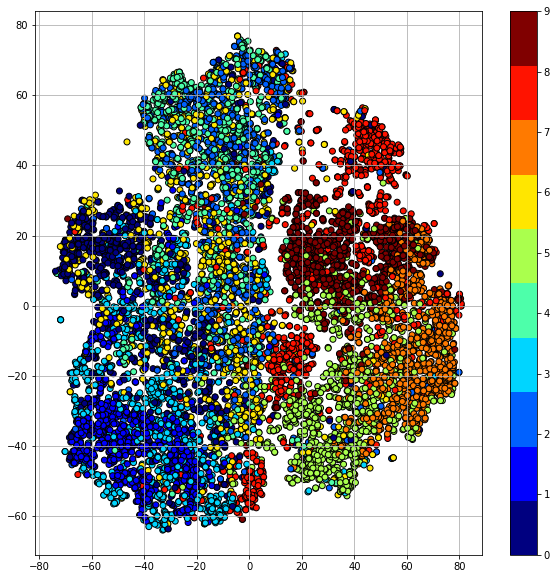

In [ ]:
scatter_plot(latent_representations=z,labels=label)

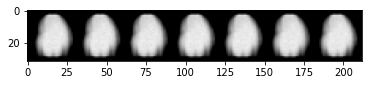

In [ ]:
with torch.no_grad():
    samples = torch.randn(7, 30).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

display_images_in_a_row(images)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Original images


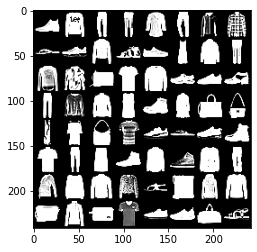

In [ ]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

print("Original images")
display_images_in_a_row(images.cpu())

torch.Size([64, 784])
torch.Size([64, 784])
Reconstructed images


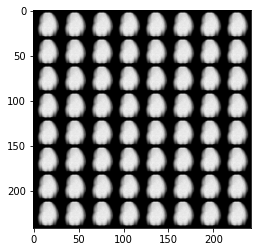

In [ ]:
with torch.no_grad():
    images = images.to(trainer.device).view(images.shape[0], -1)
    print(images.shape)
    reconstructed,x,b = trainer.model(images)
    print(reconstructed.shape)
print("Reconstructed images")
display_images_in_a_row(reconstructed)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


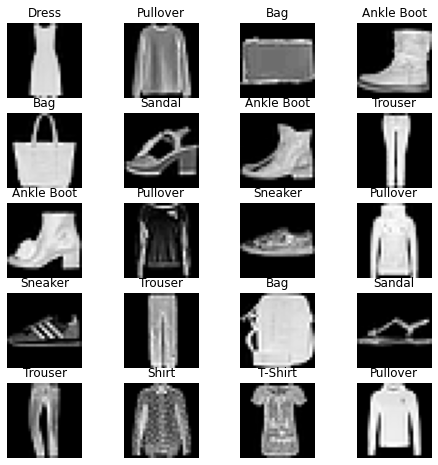

torch.Size([32, 784])
tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        ...,
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]])


100%|██████████| 1875/1875 [00:17<00:00, 105.24it/s]

====> Epoch: 1 Average loss: 0.7719



100%|██████████| 313/313 [00:02<00:00, 120.87it/s]

====> Val set loss (reconstruction error) : 0.6254



100%|██████████| 1875/1875 [00:18<00:00, 101.42it/s]

====> Epoch: 2 Average loss: 0.6029



100%|██████████| 313/313 [00:02<00:00, 116.90it/s]

====> Val set loss (reconstruction error) : 0.5847



100%|██████████| 1875/1875 [00:18<00:00, 101.00it/s]

====> Epoch: 3 Average loss: 0.5759



100%|██████████| 313/313 [00:02<00:00, 118.19it/s]

====> Val set loss (reconstruction error) : 0.5663



100%|██████████| 1875/1875 [00:18<00:00, 103.28it/s]

====> Epoch: 4 Average loss: 0.5615



100%|██████████| 313/313 [00:02<00:00, 121.26it/s]

====> Val set loss (reconstruction error) : 0.5549



100%|██████████| 1875/1875 [00:18<00:00, 102.28it/s]

====> Epoch: 5 Average loss: 0.5516



100%|██████████| 313/313 [00:02<00:00, 117.73it/s]

====> Val set loss (reconstruction error) : 0.5465



100%|██████████| 1875/1875 [00:18<00:00, 101.33it/s]

====> Epoch: 6 Average loss: 0.5442



100%|██████████| 313/313 [00:02<00:00, 117.39it/s]

====> Val set loss (reconstruction error) : 0.5400



100%|██████████| 1875/1875 [00:18<00:00, 103.70it/s]

====> Epoch: 7 Average loss: 0.5384



100%|██████████| 313/313 [00:02<00:00, 118.74it/s]

====> Val set loss (reconstruction error) : 0.5351



100%|██████████| 1875/1875 [00:18<00:00, 102.43it/s]

====> Epoch: 8 Average loss: 0.5341



100%|██████████| 313/313 [00:02<00:00, 116.78it/s]

====> Val set loss (reconstruction error) : 0.5313



100%|██████████| 1875/1875 [00:18<00:00, 101.60it/s]

====> Epoch: 9 Average loss: 0.5305



100%|██████████| 313/313 [00:02<00:00, 120.56it/s]

====> Val set loss (reconstruction error) : 0.5280



100%|██████████| 1875/1875 [00:18<00:00, 102.58it/s]

====> Epoch: 10 Average loss: 0.5273



100%|██████████| 313/313 [00:02<00:00, 118.79it/s]

====> Val set loss (reconstruction error) : 0.5249


In [ ]:


######VANILLA######################
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def scatter_plot(latent_representations, labels):
    '''
    the scatter plot for visualizing the latent representations with the ground truth class label
    ----------
    latent_presentations: (N, dimension_latent_representation)
    labels: (N, )  the labels of the ground truth classes
    '''
    # borrowed from https://gist.github.com/jakevdp/91077b0cae40f8f8244a

    # Note that if the dimension_latent_representation > 2 you need to apply TSNE transformation
    # to map the latent representations from higher dimensionality to 2D
    # You can use #from sklearn.manifold import TSNE#
    self.latent_representations = TSNE.fit_transform(self.latent_representations)
    def discrete_cmap(n, base_cmap=None):
        """Create an N-bin discrete colormap from the specified input map"""
        base = plt.cm.get_cmap(base_cmap)
        return base.from_list(base.name + str(n), base(np.linspace(0, 1, n)), n)

    plt.figure(figsize=(10, 10))
    plt.scatter(latent_representations[:, 0], latent_representations[:, 1], cmap=discrete_cmap(10, 'jet'), c=labels, edgecolors='black')
    plt.colorbar()
    plt.grid()
    plt.show()

def Plot_Kernel(_model):
    '''
    the plot for visualizing the learned weights of the autoencoder's encoder .
    ----------
    _model: Autoencoder
    '''
    # needs your implementation
    Weights = _model.encoder.Encoder[0]
    Weights = Weights.weight.view(30,28,28)
    Weights = torch.Tensor.detach(Weights).numpy()
    print(Weights[0].shape)
    plt.imshow(Weights[5])

    fig = plt.figure(figsize=(10,10));
    columns = 6;
    rows = 5;
    for i in range(1, columns*rows+1 ):
        Weights = _model.encoder.Encoder[0]
        Weights = Weights.weight.view(30,28,28)
        Weights = torch.Tensor.detach(Weights).numpy()

        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        plt.imshow(Weights[i-1])
    plt.show()
    pass

def display_images_in_a_row(images,file_path='./tmp.png', display=True):
  '''
  images: (N,28,28): N images of 28*28 as a numpy array
  file_path: file path name for where to store the figure
  display: display the image or not
  '''
  save_image(images.view(-1, 1, 28, 28),
            '{}'.format(file_path))
  if display is True:
    plt.imshow(mpimg.imread('{}'.format(file_path)))


# Defining Model
class Autoencoder(nn.Module):
    noise_type =''
    def __init__(self,dim_latent_representation=30):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=30):
                super(Encoder, self).__init__()
                self.Encoder = nn.Sequential(
                     nn.Linear(784, output_size),

                )
                pass

            def forward(self, x):
                x = self.Encoder(x)
                return x
                pass

        class Decoder(nn.Module):
            def __init__(self, input_size=30):
                super(Decoder, self).__init__()
                self.Decoder = nn.Sequential(
                    nn.Linear(input_size,784),
                    nn.Tanh()
                )
                pass

            def forward(self, z):
                z = self.Decoder(z)
                return z
                pass

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    # Implement this function for the DAE model
    def add_noise(self, x, noise_type):
         if noise_type=='Gaussian':
             x = x+torch.randn_like(x) * 0.3
             x = torch.clip(x,0.,1.)
             return x
         elif noise_type=='Dropout':
             dropout = nn.Dropout(0.3)
             x = dropout(x)
             return x
         else:
           return x

    # Implement this function for the VAE model
    # def reparameterise(self, mu, logvar):
    #     if self.training:
    #         # return reparametrized mu
    #     else:
    #         return mu

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        x = self.encoder(self.add_noise(x, self.noise_type))
        x = self.decoder(self.add_noise(x, self.noise_type))
        # for the VAE forward function should also return mu and logvar
        return x


class Autoencoder_Trainer(object):

    def __init__(self, autoencoder_model, learning_rate=1e-3, path_prefix=""):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.init_dataset(path_prefix)
        self.model = autoencoder_model
        self.model.to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate, weight_decay=1e-5)

    def init_dataset(self, path_prefix=""):
        # load and preprocess dataset
        transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
        trainTransform = torchvision.transforms.Compose(
            [torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
        trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix), train=True, download=True,
                                                     transform=transform)
        train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, num_workers=4)
        valset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix), train=False, download=True,
                                                   transform=transform)
        val_loader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=False, num_workers=4)

        images, labels = next(iter(train_loader))
        images = images.view(images.shape[0], -1)
        print(images.shape)
        print(images)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.valset = valset
        self.trainset = trainset

    def loss_function(self, recon_x, x):
        # Note that this function should be modified for the VAE part.
        # KLD term should be added to the final Loss.

        BCE = F.mse_loss(recon_x, x)
        Loss = BCE
        return Loss

    def get_train_set(self):
        images = torch.vstack([x for x, _ in self.train_loader])  # get the entire train set
        return images

    def get_val_set(self):
        images = torch.vstack([x for x, _ in self.val_loader])  # get the entire val set
        return images

    def train(self, epoch):
        # Note that you need to modify both trainer and loss_function for the VAE model
        self.model.train()
        train_loss = 0
        for batch_idx, (data, _) in tqdm(enumerate(self.train_loader), total=len(self.train_loader)):

            data = data.view(data.shape[0], -1)

            data = data.to(self.device)
            # print(data.shape)
            # print(data)
            self.optimizer.zero_grad()
            recon_batch = self.model(data)
            loss = self.loss_function(recon_batch, data)
            loss.backward()
            train_loss += loss.item()
            self.optimizer.step()

        train_loss /= len(self.train_loader.dataset) / 32  # 32 is the batch size
        print('====> Epoch: {} Average loss: {:.4f}'.format(
            epoch, train_loss))

    def validate(self, epoch):
        self.model.eval()
        val_loss = 0
        with torch.no_grad():
            for i, (data, _) in tqdm(enumerate(self.val_loader), total=len(self.val_loader)):
                data = data.view(data.shape[0], -1)

                data = data.to(self.device)
                recon_batch = self.model(data)
                val_loss += self.loss_function(recon_batch, data).item()

        val_loss /= len(self.val_loader.dataset) / 32  # 32 is the batch size
        print('====> Val set loss (reconstruction error) : {:.4f}'.format(val_loss))

path_prefix = ""

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix), train = True, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, num_workers=4)
valset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix), train=False, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=False, num_workers=4)

labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};


fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(trainset));
    img = Autoencoder(dim_latent_representation=30).add_noise(trainset[img_xy][0][0,:,:],"")
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[trainset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()


LEARNING_RATE = 1e-4

EPOCH_NUMBER= 10 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=30)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:
        x = x.view(x.shape[0], -1)
        y = y.view(y.shape[0], -1)

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)





In [ ]:
def scatter_plot(latent_representations, labels):
    '''
    the scatter plot for visualizing the latent representations with the ground truth class label
    ----------
    latent_presentations: (N, dimension_latent_representation)
    labels: (N, )  the labels of the ground truth classes
    '''
    # borrowed from https://gist.github.com/jakevdp/91077b0cae40f8f8244a

    # Note that if the dimension_latent_representation > 2 you need to apply TSNE transformation
    # to map the latent representations from higher dimensionality to 2D
    # You can use #from sklearn.manifold import TSNE#
    latent_representations = TSNE().fit_transform(latent_representations)
    def discrete_cmap(n, base_cmap=None):
        """Create an N-bin discrete colormap from the specified input map"""
        base = plt.cm.get_cmap(base_cmap)
        return base.from_list(base.name + str(n), base(np.linspace(0, 1, n)), n)

    plt.figure(figsize=(10, 10))
    plt.scatter(latent_representations[:, 0], latent_representations[:, 1], cmap=discrete_cmap(10, 'jet'), c=labels, edgecolors='black')
    plt.colorbar()
    plt.grid()
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


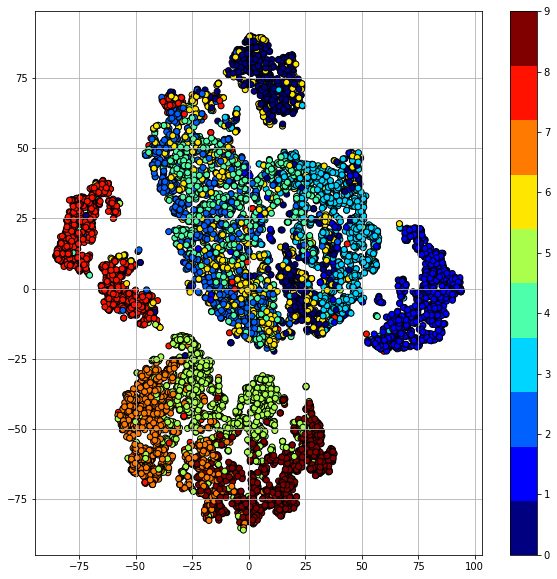

In [ ]:
scatter_plot(latent_representations=z,labels=label)